In [90]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
#from sklearn import metrics #for making the confusion matrix and finding the accuracy of the model



In [91]:
df=pd.read_csv("data.csv")

In [92]:
Y=[]
for i in df["diagnosis"]:
    if i=="M":
        Y.append(1.0)
    else:
        Y.append(0.0)


        
#Y -> stores whether the person has malignant or benign tumor
#Y -> 1 for malignant tumor
#  -> 0 for benign tumor
#shape of Y is (569,1)

In [93]:
Y=pd.DataFrame(Y)

In [94]:
df=df.drop(["diagnosis","id","Unnamed: 32"],axis=1) 
#removing unnecessary columns

In [95]:
X_train, X_test, y_train, y_test = train_test_split(df, Y, test_size = 0.2, random_state = 0)

In [96]:
X_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)

In [229]:
    def initialize_parameters(layers_dims):
        np.random.seed(1)               
        parameters = {}
        L = len(layers_dims) #L is no of layers           

        for l in range(1, L):           
            parameters["W" + str(l)] = np.random.randn(
                layers_dims[l], layers_dims[l - 1]) * 0.01  # multiplird by 0.01 so that activation functions work in activated mode
            parameters["b" + str(l)] = np.zeros((layers_dims[l], 1))

        assert parameters["W" + str(l)].shape == (
            layers_dims[l], layers_dims[l - 1])
        assert parameters["b" + str(l)].shape == (layers_dims[l], 1)
    
        return parameters

    def sigmoid(Z):
        A = 1 / (1 + np.exp(-Z))
        return A, Z


    def linear_forward(A_prev, W, b):
        Z = np.dot(W, A_prev) + b
        cache = (A_prev, W, b)
        return Z, cache


    def linear_activation_forward(A_prev, W, b):

        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
        assert A.shape == (W.shape[0], A_prev.shape[1])

        cache = (linear_cache, activation_cache)
        return A, cache


    def L_model_forward(X, parameters):
        A = X.T                          
        caches = []                     
        L = len(parameters) // 2        

        for l in range(1, L):
            A_prev = A
            A, cache = linear_activation_forward(
            A_prev, parameters["W" + str(l)], parameters["b" + str(l)])
            caches.append(cache)

        AL, cache = linear_activation_forward(A, parameters["W" + str(L)], parameters["b" + str(L)])
        caches.append(cache)

        assert AL.shape == (1, X.shape[0])
        return AL, caches
        
    def compute_cost(AL, y):
        m = y.shape[1]              
        cost = - (1 / m) * np.sum(
        np.multiply(y, np.log(AL)) + np.multiply(1 - y, np.log(1 - AL)))
        return cost
    
    def sigmoid_gradient(dA, Z):
        A, Z = sigmoid(Z)
        dZ = dA * A * (1 - A)
        return dZ
    
    # define helper functions that will be used in L-model back-prop
    def linear_backword(dZ, cache):
        A_prev, W, b = cache
        m = A_prev.shape[1]

        dW = (1 / m) * np.dot(dZ, A_prev.T)
        db = (1 / m) * np.sum(dZ, axis=1, keepdims=True)
        dA_prev = np.dot(W.T, dZ)

        assert dA_prev.shape == A_prev.shape
        assert dW.shape == W.shape
        assert db.shape == b.shape

        return dA_prev, dW, db


    def linear_activation_backward(dA, cache):
        linear_cache, activation_cache = cache
        dZ = sigmoid_gradient(dA, activation_cache)
        dA_prev, dW, db = linear_backword(dZ, linear_cache)

        return dA_prev, dW, db


    def L_model_backward(AL, y, caches):
        y = y.reshape(AL.shape)
        L = len(caches)
        grads = {}

        dAL = np.divide(AL - y, np.multiply(AL, 1 - AL))

        grads["dA" + str(L - 1)], grads["dW" + str(L)], grads[
        "db" + str(L)] = linear_activation_backward(
            dAL, caches[L - 1])

        for l in range(L - 1, 0, -1):
            current_cache = caches[l - 1]
            grads["dA" + str(l - 1)], grads["dW" + str(l)], grads[
            "db" + str(l)] = linear_activation_backward(
                grads["dA" + str(l)], current_cache)

        return grads
    
    def update_parameters(parameters, grads, learning_rate):
        L = len(parameters) // 2

        for l in range(1, L + 1):
            parameters["W" + str(l)] = parameters[
            "W" + str(l)] - learning_rate * grads["dW" + str(l)]
            parameters["b" + str(l)] = parameters[
            "b" + str(l)] - learning_rate * grads["db" + str(l)]
        return parameters
    
        
    

In [256]:
# Define the multi-layer model using all the helper functions we wrote before
def L_layer_model(
        X, y, layers_dims, learning_rate=0.01, num_iterations=3000,
        print_cost=True):
    np.random.seed(1)

    # initialize parameters
    parameters = initialize_parameters(layers_dims)

    # intialize cost list
    cost_list = []

    # iterate over num_iterations
    for i in range(num_iterations):
        # iterate over L-layers to get the final output and the cache
        AL, caches = L_model_forward(
            X, parameters)

        # compute cost to plot it
        cost = compute_cost(AL.T, y)

        # iterate over L-layers backward to get gradients
        grads = L_model_backward(AL, y.to_numpy(), caches)

        # update parameters
        parameters = update_parameters(parameters, grads, learning_rate)

        # append each 100th cost to the cost list
        if (i + 1) % 100 == 0 and print_cost:
            #print(f"The cost after {i + 1} iterations is:" cost)
            print("iteration :",i,"cost:",cost)

        if i % 100 == 0:
            cost_list.append(cost)

    # plot the cost curve
    plt.figure(figsize=(10, 6))
    plt.plot(cost_list)
    plt.xlabel("Iterations (per hundreds)")
    plt.ylabel("Loss")
    plt.title(f"Loss curve for the learning rate = {learning_rate}")

    return parameters


In [257]:
layers_dims = [X_train.shape[1], 5, 3, 1]

iteration : 99 cost: 0    299.379387
dtype: float64
iteration : 199 cost: 0    298.074897
dtype: float64
iteration : 299 cost: 0    297.878576
dtype: float64
iteration : 399 cost: 0    297.676874
dtype: float64
iteration : 499 cost: 0    297.426452
dtype: float64
iteration : 599 cost: 0    297.134537
dtype: float64
iteration : 699 cost: 0    296.704747
dtype: float64
iteration : 799 cost: 0    296.167617
dtype: float64
iteration : 899 cost: 0    295.535835
dtype: float64
iteration : 999 cost: 0    294.7468
dtype: float64
iteration : 1099 cost: 0    293.219171
dtype: float64
iteration : 1199 cost: 0    292.10756
dtype: float64
iteration : 1299 cost: 0    289.355031
dtype: float64
iteration : 1399 cost: 0    289.015633
dtype: float64
iteration : 1499 cost: 0    283.433193
dtype: float64
iteration : 1599 cost: 0    284.852258
dtype: float64
iteration : 1699 cost: 0    274.289698
dtype: float64
iteration : 1799 cost: 0    273.458497
dtype: float64
iteration : 1899 cost: 0    267.323329
dty

/home/chetan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in exp


iteration : 2399 cost: 0    217.861683
dtype: float64
iteration : 2499 cost: 0    197.421543
dtype: float64
iteration : 2599 cost: 0    229.132639
dtype: float64
iteration : 2699 cost: 0    188.701771
dtype: float64
iteration : 2799 cost: 0    179.664182
dtype: float64
iteration : 2899 cost: 0    163.314885
dtype: float64
iteration : 2999 cost: 0    160.733037
dtype: float64


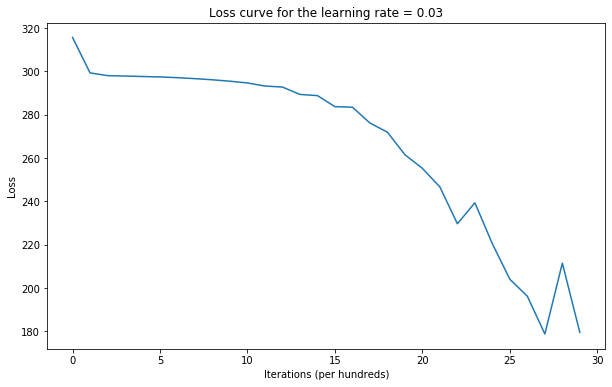

In [258]:
par = L_layer_model( X_train, y_train, layers_dims, learning_rate=0.03, num_iterations=3000)

In [233]:
y_train.shape

(455, 1)

In [234]:
par=initialize_parameters(layers_dims)


In [235]:
par

{'W1': array([[ 0.01624345, -0.00611756, -0.00528172, -0.01072969,  0.00865408,
         -0.02301539,  0.01744812, -0.00761207,  0.00319039, -0.0024937 ,
          0.01462108, -0.02060141, -0.00322417, -0.00384054,  0.01133769,
         -0.01099891, -0.00172428, -0.00877858,  0.00042214,  0.00582815,
         -0.01100619,  0.01144724,  0.00901591,  0.00502494,  0.00900856,
         -0.00683728, -0.0012289 , -0.00935769, -0.00267888,  0.00530355],
        [-0.00691661, -0.00396754, -0.00687173, -0.00845206, -0.00671246,
         -0.00012665, -0.0111731 ,  0.00234416,  0.01659802,  0.00742044,
         -0.00191836, -0.00887629, -0.00747158,  0.01692455,  0.00050808,
         -0.00636996,  0.00190915,  0.02100255,  0.00120159,  0.00617203,
          0.0030017 , -0.0035225 , -0.01142518, -0.00349343, -0.00208894,
          0.00586623,  0.00838983,  0.00931102,  0.00285587,  0.00885141],
        [-0.00754398,  0.01252868,  0.0051293 , -0.00298093,  0.00488518,
         -0.00075572,  0.01131

In [236]:
A_L,caches=L_model_forward(X_train,par)

In [237]:
A_L

array([[0.50127322, 0.50127312, 0.50127327, 0.50127334, 0.50127315,
        0.50127332, 0.50127322, 0.50127329, 0.50127321, 0.50127325,
        0.50127318, 0.50127318, 0.50127316, 0.5012733 , 0.50127332,
        0.50127328, 0.50127316, 0.50127313, 0.50127329, 0.50127325,
        0.50127324, 0.50127334, 0.50127323, 0.50127315, 0.5012731 ,
        0.50127329, 0.50127329, 0.50127335, 0.50127294, 0.50127327,
        0.50127331, 0.50127318, 0.50127321, 0.50127322, 0.50127322,
        0.50127329, 0.50127331, 0.5012733 , 0.50127315, 0.50127319,
        0.50127329, 0.50127313, 0.50127324, 0.50127304, 0.50127329,
        0.50127282, 0.50127319, 0.50127329, 0.50127318, 0.50127316,
        0.50127331, 0.50127318, 0.50127302, 0.50127317, 0.50127324,
        0.5012733 , 0.50127324, 0.50127331, 0.50127331, 0.50127325,
        0.50127318, 0.50127302, 0.5012732 , 0.50127327, 0.50127332,
        0.50127311, 0.50127312, 0.50127317, 0.50127323, 0.501273  ,
        0.50127335, 0.5012733 , 0.50127319, 0.50

In [238]:
caches

[((                                0           1           2           3    \
   radius_mean               10.050000   10.800000   16.140000   12.180000   
   texture_mean              17.530000   21.980000   14.860000   17.840000   
   perimeter_mean            64.410000   68.790000  104.300000   77.790000   
   area_mean                310.800000  359.900000  800.000000  451.100000   
   smoothness_mean            0.100700    0.088010    0.094950    0.104500   
   compactness_mean           0.073260    0.057430    0.085010    0.070570   
   concavity_mean             0.025110    0.036140    0.055000    0.024900   
   concave points_mean        0.017750    0.014040    0.045280    0.029410   
   symmetry_mean              0.189000    0.201600    0.173500    0.190000   
   fractal_dimension_mean     0.063310    0.059770    0.058750    0.066350   
   radius_se                  0.261900    0.307700    0.238700    0.366100   
   texture_se                 2.015000    1.621000    0.637200  

In [239]:
cost=compute_cost(A_L.T,y_train)
print(A_L.shape)
print(y_train.shape)

(1, 455)
(455, 1)


In [240]:
cost

0    315.701802
dtype: float64

In [241]:
grads=L_model_backward(A_L,y_train.to_numpy(),caches)

In [242]:
A_L.shape


(1, 455)

In [243]:
y_train.shape

(455, 1)

In [244]:
grads

{'dA2': array([[-0.00087574, -0.00087574, -0.00087574, ..., -0.00087574,
         -0.00087574, -0.00087574],
        [ 0.00494423,  0.00494423,  0.00494423, ...,  0.00494423,
          0.00494424,  0.00494423],
        [ 0.00107039,  0.00107039,  0.00107039, ...,  0.00107039,
          0.00107039,  0.00107039]]),
 'dW3': array([[0.06969159, 0.06889301, 0.06950336]]),
 'db3': array([[0.13863584]]),
 'dA1': array([[-1.94271830e-06, -1.94271893e-06, -1.94272097e-06, ...,
         -1.94271842e-06, -1.94271849e-06, -1.94271886e-06],
        [ 9.76060270e-07,  9.76045782e-07,  9.76003648e-07, ...,
          9.76052721e-07,  9.76064460e-07,  9.76046709e-07],
        [-3.08001976e-06, -3.08001175e-06, -3.07999468e-06, ...,
         -3.08001307e-06, -3.08002348e-06, -3.08001407e-06],
        [-5.36651267e-06, -5.36649733e-06, -5.36644675e-06, ...,
         -5.36650662e-06, -5.36651697e-06, -5.36649628e-06],
        [-1.35093779e-05, -1.35093651e-05, -1.35093811e-05, ...,
         -1.35093503e-0

In [245]:
par=update_parameters(par,grads,0.02)

In [246]:
par

{'W1': array([[ 0.01624347, -0.00611753, -0.0052816 , -0.01072925,  0.00865408,
         -0.02301539,  0.01744812, -0.00761207,  0.00319039, -0.0024937 ,
          0.01462108, -0.0206014 , -0.00322417, -0.00384055,  0.01133769,
         -0.01099891, -0.00172428, -0.00877858,  0.00042214,  0.00582815,
         -0.01100617,  0.01144728,  0.00901602,  0.0050251 ,  0.00900856,
         -0.00683728, -0.0012289 , -0.00935769, -0.00267888,  0.00530355],
        [-0.00691661, -0.00396754, -0.00687173, -0.00845207, -0.00671246,
         -0.00012665, -0.0111731 ,  0.00234416,  0.01659802,  0.00742044,
         -0.00191836, -0.00887629, -0.00747158,  0.01692455,  0.00050808,
         -0.00636996,  0.00190915,  0.02100255,  0.00120159,  0.00617203,
          0.0030017 , -0.0035225 , -0.01142518, -0.00349344, -0.00208894,
          0.00586623,  0.00838983,  0.00931102,  0.00285587,  0.00885141],
        [-0.00754393,  0.01252876,  0.00512963, -0.00297912,  0.00488518,
         -0.00075572,  0.01131